In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
from scipy.stats import lognorm, halfgennorm, powerlaw
import numpy as np
from fitter import Fitter

In [23]:
original_df = pd.read_csv('data/original/fm_interactions.csv', delimiter='\t')

In [24]:
original_df.head()

,user_id,item_id,interaction_type,week
0,1000028,645285,3,14
1,1000034,1454772,3,12
2,1000034,1475304,2,12
3,1000034,1511509,3,9
4,1000034,153352,3,12


In [25]:
"""
There are five classes of interaction type per user.  These classes are:

0 = XING showed this item to a user (= impression)

1 = the user clicked on the item

2 = the user bookmarked the item on XING

3 = the user clicked on the reply button or application form button that is shown on some job postings

4 = the user deleted a recommendation from his/her list of recommendation (clicking on "x")
    which has the effect that the recommendation will no longer been shown to the user and that a new 
    recommendation item will be loaded and displayed to the user
    
5 = a recruiter from the items company showed interest into the user. (e.g. clicked on the profile)
"""
print(sorted(original_df['interaction_type'].unique()))

[0, 1, 2, 3, 4, 5]


In [26]:
"""
There are 1,096,350 unique users in the dataset
"""
print(len(original_df.user_id.unique()))

1096350


In [27]:
print(original_df.shape)

(10319324, 4)


In [28]:
users_df = pd.read_csv('data/original/users.csv', delimiter='\t')

In [29]:
users_df.head()

,recsyschallenge_v2017_users_final_anonym_export_unique.id,recsyschallenge_v2017_users_final_anonym_export_unique.jobroles,recsyschallenge_v2017_users_final_anonym_export_unique.career_level,recsyschallenge_v2017_users_final_anonym_export_unique.discipline_id,recsyschallenge_v2017_users_final_anonym_export_unique.industry_id,recsyschallenge_v2017_users_final_anonym_export_unique.country,recsyschallenge_v2017_users_final_anonym_export_unique.region,recsyschallenge_v2017_users_final_anonym_export_unique.experience_n_entries_class,recsyschallenge_v2017_users_final_anonym_export_unique.experience_years_experience,recsyschallenge_v2017_users_final_anonym_export_unique.experience_years_in_current,recsyschallenge_v2017_users_final_anonym_export_unique.edu_degree,recsyschallenge_v2017_users_final_anonym_export_unique.edu_fieldofstudies,recsyschallenge_v2017_users_final_anonym_export_unique.wtcj,recsyschallenge_v2017_users_final_anonym_export_unique.premium
0,30,2551922,3,0,0,de,0,1,3,1,2,2,1,0
1,50,"4375874,3415336,2152789,1431010",3,4,15,de,7,3,4,1,2,"5,8",1,0
2,70,"851763,2070276",3,17,4,de,2,2,7,2,0,NaN,1,0
3,90,"2139882,2177068,1520218,3113130,399936",0,0,0,de,0,1,0,0,0,NaN,0,0
4,100,"233434,3142896,3836967,987884",3,0,16,non_dach,0,3,5,5,0,NaN,0,0


In [30]:
users_df.shape

(1497020, 14)

In [31]:
"""
Filter out interactions outside of the categories 1, 2 and 3.  These three categories are all interactions
that suggest user optimism.

Once the categories are filtered, group the interactions by user_id to get the total count of interactions
for each user.
"""
interaction_df = original_df[original_df['interaction_type'].isin([1, 2, 3])]
user_group = interaction_df.groupby(['user_id'])
user_interaction_count = user_group['item_id'].count()

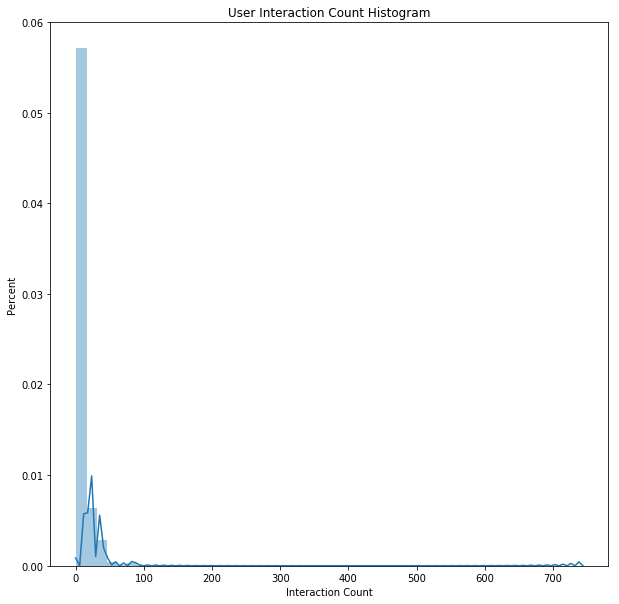

In [32]:
"""
Plot the distribution.

We see in the plot below that the vast majority of users have a number of interactions between 1 and 100,
with a small number of outliers.
"""
fig = plt.figure(figsize=(10, 10))
graph = sns.distplot(user_interaction_count)
graph.set_title('User Interaction Count Histogram')
graph.set(ylabel='Percent', xlabel='Interaction Count')
plt.show()

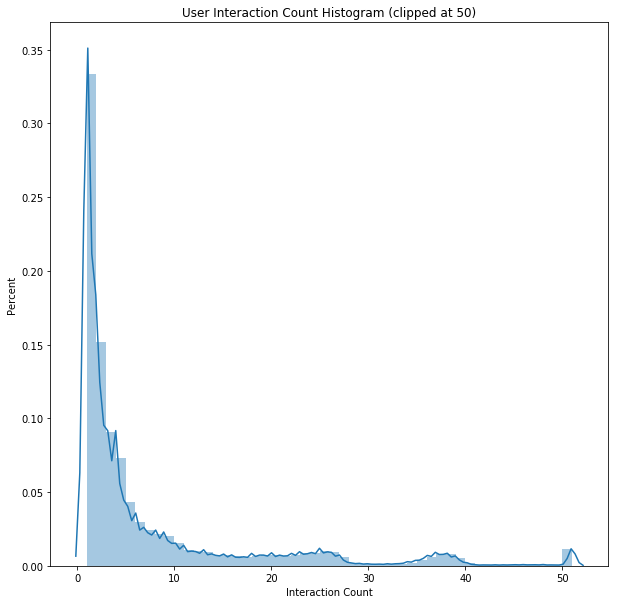

In [33]:
"""
After removing the outlier interactions, we see that our users usually have interactions between 0 and 40 times.
"""
fig = plt.figure(figsize=(10, 10))
clipped_interactions = user_interaction_count.clip(0, 51)
graph = sns.distplot(clipped_interactions)
graph.set_title('User Interaction Count Histogram (clipped at 50)')
graph.set(ylabel='Percent', xlabel='Interaction Count')
plt.show()

/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:562: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:566: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Fitted betaprime distribution with error=0.16342468683632044)
Fitted halfgennorm distribution with error=0.08159957787846056)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:3656: RuntimeWarning: overflow encountered in power
  return a*(a + x**a)**(-1.0/a-1)


Fitted kappa3 distribution with error=0.15883690432174494)
Fitted bradford distribution with error=0.11543820681718626)
Fitted lognorm distribution with error=0.09813062478695624)


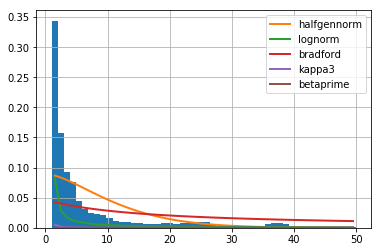

In [10]:
""" Using the 'Fitter' library: https://pypi.python.org/pypi/fitter - we can get a ranking of what distributions fit
    the dataset well.  One should note that empty bins are taken into account for the mean error, so it is beneficial
    to be mindful that your bins should follow a continuous trend.
"""
f = Fitter(
    clipped_interactions,
    distributions=['betaprime', 'halfgennorm', 'kappa3', 'bradford', 'lognorm', 'powerlaw'],
    bins=50,
    xmin=1,
    xmax=50)
f.fit()
f.summary()
plt.show()

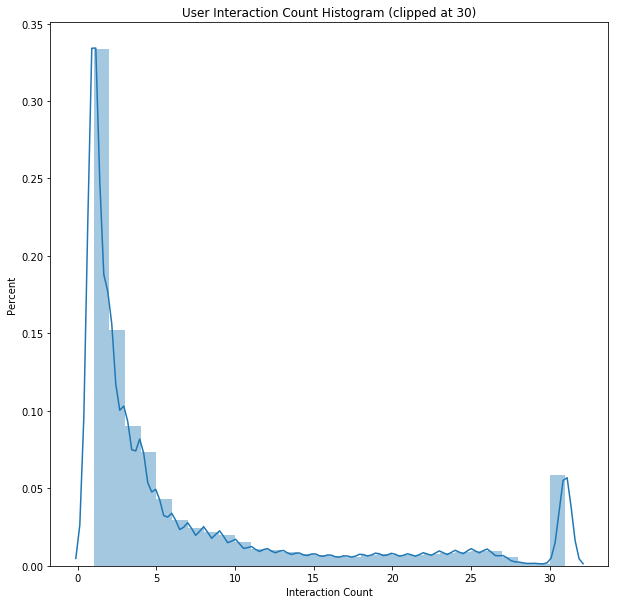

In [38]:
"""
The empty bins threw off the algorithm quite a bit.  If we reduce the number of bins to 30, we see that our
distribution continuously decreases, suggesting our fit will be more accurate.
"""

clipped_interactions = user_interaction_count.clip(1, 31)
fig = plt.figure(figsize=(10, 10))
graph = sns.distplot(clipped_interactions, bins = 30)
graph.set_title('User Interaction Count Histogram (clipped at 30)')
graph.set(ylabel='Percent', xlabel='Interaction Count')
plt.show()

/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Fitted alpha distribution with error=0.007071219975375971)
Fitted anglit distribution with error=0.1244746042369856)
Fitted arcsine distribution with error=0.12015979577973242)
Fitted argus distribution with error=0.1358915630828156)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:412: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Fitted beta distribution with error=0.035181111037683836)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:562: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:566: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


Fitted betaprime distribution with error=0.06069108286018876)
Fitted bradford distribution with error=0.08911139905628968)
Fitted burr distribution with error=0.09941514893896301)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:726: RuntimeWarning: overflow encountered in power
  return np.log(c) + np.log(d) + sc.xlogy(c - 1, x) + sc.xlog1py(-d-1, x**c)


Fitted burr12 distribution with error=0.05106237118459449)
Fitted cauchy distribution with error=0.02538842919556106)
Fitted chi distribution with error=0.02530444362241323)
Fitted chi2 distribution with error=0.010584631702287444)
Fitted cosine distribution with error=0.1210007982911219)
Fitted dgamma distribution with error=0.07388201959444467)
Fitted dweibull distribution with error=0.07944598992858036)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.05.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0333333333333332.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0499999999999998.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0666666666666664.


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.93733142531344127.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.35732282605219012.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.57803293310076098.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4

/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.51882595485754024.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.52049821227262649.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40212576870211525.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.5

/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.44437103773549946.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4602886609283946.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4746922258018389.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.465

/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.41187370018477742.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.41525449822402993.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.41271889969459052.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4

/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40944215329186673.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.402211302600954.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.41172122970694836.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.409

/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40655163308230713.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4056410652106518.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40554616768126517.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40

/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40594663721151514.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40605444913024041.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40597557536535045.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4

/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40591027600531748.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40591916734058053.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40591542254357926.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4

/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40591713436625743.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40591783771587414.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40591831906996606.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4

/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40591770827628731.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40591770385934894.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40591770523307869.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4

/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40591770497164015.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40591770497432322.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40591770497615953.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4

/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40591770497382945.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40591770497381263.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40591770497381785.
  RuntimeWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2131: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4

Fitted erlang distribution with error=0.006709021865938301)
Fitted expon distribution with error=0.040637390893519344)
Fitted exponnorm distribution with error=0.040422887623719005)
Fitted exponpow distribution with error=0.028775513924208865)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1240: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


Fitted exponweib distribution with error=0.04000319313103549)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1429: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


Fitted f distribution with error=0.029399108597340053)
Fitted fatiguelife distribution with error=0.0558543608616068)
Fitted fisk distribution with error=0.07486341189530994)
Fitted foldcauchy distribution with error=0.010017760460634972)
Fitted foldnorm distribution with error=0.0878726028201066)
Fitted frechet_l distribution with error=0.18661478816313398)
Fitted frechet_r distribution with error=0.08309278415994552)
Fitted gamma distribution with error=0.01919689081978363)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2595: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


Fitted gausshyper distribution with error=0.020075007229087415)
Fitted genexpon distribution with error=0.04063782589833744)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1902: RuntimeWarning: invalid value encountered in true_divide
  np.sign(c)*(-g3+(g2+2*g2mg12)*g1)/((g2mg12)**(3./2.)))
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1907: RuntimeWarning: invalid value encountered in true_divide
  (g4+(-4*g3+3*(g2+g2mg12)*g1)*g1)/((g2mg12)**2))


Fitted genextreme distribution with error=0.15667405546185414)
Fitted gengamma distribution with error=0.01704909087361447)
Fitted genhalflogistic distribution with error=0.08311217098325753)
Fitted genlogistic distribution with error=0.08328455807881584)
Fitted gennorm distribution with error=0.04172503157930595)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1761: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


Fitted genpareto distribution with error=0.15667496287705182)
Fitted gilbrat distribution with error=0.017529300654119666)
Fitted gompertz distribution with error=0.04364409058824689)
Fitted gumbel_l distribution with error=0.12667755514249784)
Fitted gumbel_r distribution with error=0.08337030995135854)
Fitted halfcauchy distribution with error=0.010017202919479308)
Fitted halfgennorm distribution with error=0.003920698809688914)
Fitted halflogistic distribution with error=0.06972565708272971)
Fitted halfnorm distribution with error=0.0878708902410686)
Fitted hypsecant distribution with error=0.09072695391142559)
Fitted invgamma distribution with error=0.15666822039499395)
Fitted invgauss distribution with error=0.14203376843113555)
Fitted invweibull distribution with error=0.15667659215659488)
Fitted johnsonsb distribution with error=0.09176913185759707)
Fitted johnsonsu distribution with error=0.15645686481703996)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:3656: RuntimeWarning: overflow encountered in power
  return a*(a + x**a)**(-1.0/a-1)


Fitted kappa3 distribution with error=0.15227225145706008)
Fitted kappa4 distribution with error=0.11311928477398984)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:43: RuntimeWarning: floating point number truncated to an integer
  return 1.0 - sc.smirnov(n, x)


SKIPPED ksone distribution (taking more than 120 seconds)
Fitted kstwobign distribution with error=0.09301657293341181)
Fitted laplace distribution with error=0.07852414023481921)
Fitted levy distribution with error=0.14468158635464567)
Fitted levy_l distribution with error=0.145880062902392)
SKIPPED levy_stable distribution (taking more than 120 seconds)
Fitted loggamma distribution with error=0.11317190320561415)
Fitted logistic distribution with error=0.09895915609319966)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:3165: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:3156: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


Fitted loglaplace distribution with error=0.00987786681414227)
Fitted lognorm distribution with error=0.11452054380798853)
Fitted lomax distribution with error=0.02124670390394859)
Fitted maxwell distribution with error=0.10518568049837182)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


Fitted mielke distribution with error=0.0447533348805035)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:3692: RuntimeWarning: divide by zero encountered in power
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


Fitted nakagami distribution with error=0.03387721197796434)
SKIPPED ncf distribution (taking more than 120 seconds)
SKIPPED nct distribution (taking more than 120 seconds)
SKIPPED ncx2 distribution (taking more than 120 seconds)
Fitted norm distribution with error=0.11233981994140017)
Fitted pareto distribution with error=0.15401531833499327)
Fitted pearson3 distribution with error=0.010367994883011348)
Fitted powerlaw distribution with error=0.05501177463903262)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4289: RuntimeWarning: divide by zero encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4289: RuntimeWarning: invalid value encountered in multiply
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4289: RuntimeWarning: overflow encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))


SKIPPED powerlognorm distribution (taking more than 120 seconds)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4321: RuntimeWarning: divide by zero encountered in power
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4321: RuntimeWarning: invalid value encountered in multiply
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))


Fitted powernorm distribution with error=nan)
Fitted rayleigh distribution with error=0.10308129033824906)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4355: RuntimeWarning: divide by zero encountered in power
  return np.power((1.0 - x**2), c / 2.0 - 1) / sc.beta(0.5, c / 2.0)


Fitted rdist distribution with error=0.07695482350536828)
Fitted recipinvgauss distribution with error=0.03525660148478284)
Fitted reciprocal distribution with error=0.15667791352704932)
Fitted rice distribution with error=0.10308110931266959)
SKIPPED rv_continuous distribution (taking more than 120 seconds)
SKIPPED rv_histogram distribution (taking more than 120 seconds)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1612: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


Fitted semicircular distribution with error=0.1272002568483413)
Fitted skewnorm distribution with error=0.08785209587883568)
Fitted t distribution with error=0.01496053920762293)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4693: RuntimeWarning: divide by zero encountered in true_divide
  choicelist = [u * x / c, u, u * (1 - x) / (1 - d)]


Fitted trapz distribution with error=0.15682666097526782)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4742: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(x < c, 2*x/c, 2*(1-x)/(1-c))


Fitted triang distribution with error=0.10183868557383444)
Fitted truncexpon distribution with error=0.10350090929241025)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4846: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4846: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


Fitted truncnorm distribution with error=0.15667791352704932)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4904: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:3919: RuntimeWarning: overflow encountered in multiply
  trm1 = np.sqrt(2)*nc*x*sc.hyp1f1(n/2+1, 1.5, valF)


SKIPPED tukeylambda distribution (taking more than 120 seconds)
Fitted uniform distribution with error=0.12334458019542212)
Fitted vonmises distribution with error=8.052375684787686)
Fitted vonmises_line distribution with error=0.20507657434695578)
Fitted wald distribution with error=0.026417087536693026)
Fitted weibull_max distribution with error=0.18661478816313398)
Fitted weibull_min distribution with error=0.08309278415994552)
Fitted wrapcauchy distribution with error=nan)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/optimize/optimize.py:528: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


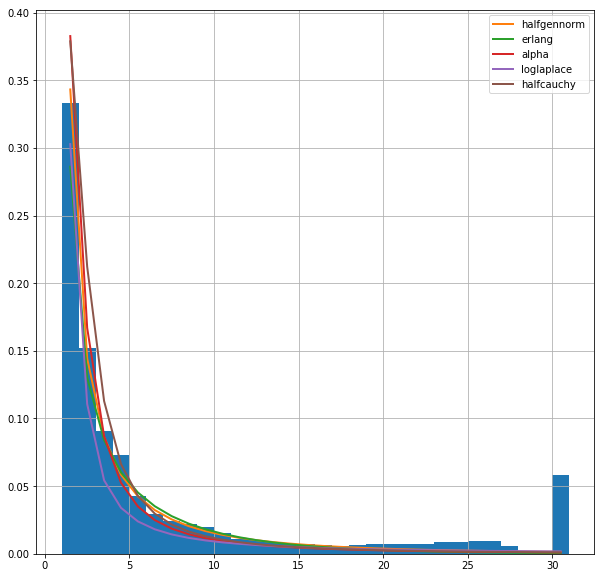

In [39]:
fig = plt.figure(figsize=(10, 10))
f = Fitter(
    clipped_interactions,
    # distributions=['betaprime', 'halfgennorm', 'kappa3', 'bradford', 'lognorm', 'powerlaw'],
    bins=30,
    xmin=1,
    xmax=31,
    timeout=120,
)
f.fit()
f.summary()
plt.show()

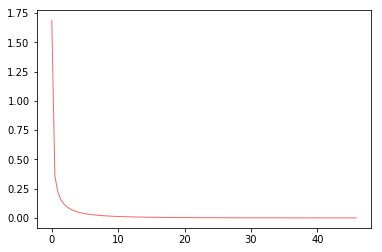

0.343157359972
0.315549262012 1.0 0.0484512896077


In [35]:
shape, loc, scale = f.fitted_param['halfgennorm']
x = np.linspace(halfgennorm.ppf(0.01, *f.fitted_param['halfgennorm']),
                halfgennorm.ppf(0.99, *f.fitted_param['halfgennorm']), 100)
plt.plot(x - loc, halfgennorm.pdf(x, *f.fitted_param['halfgennorm']),
       'r-', lw=1, alpha=0.6, label='lognorm pdf')
plt.show()
print(halfgennorm.pdf(1.5, *f.fitted_param['halfgennorm']))
print(shape, loc, scale)

In [40]:
"""
The 'fit' function does not appear to work well with the lognormal distribution.  After trial and error, it appears
that a value close to 1.46 fits our distribution quite well.
"""

fig = plt.figure(figsize=(10, 10))
sns.distplot(clipped_interactions, bins=30)
sns.set_title('Lognorm PDF')
sns.set(xlabel='Interaction Count', ylabel='Percent')
s = 1.46
x = np.linspace(lognorm.ppf(0.01, s),
                lognorm.ppf(0.99, s), 100)
plt.plot(x, lognorm.pdf(x, s),
       'r-', lw=1, alpha=0.6, label='lognorm pdf')
plt.show()

AttributeError: module 'seaborn' has no attribute 'set_title'

/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1612: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:3919: RuntimeWarning: overflow encountered in multiply
  trm1 = np.sqrt(2)*nc*x*sc.hyp1f1(n/2+1, 1.5, valF)
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1612: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


In [12]:
delta = .001
lognorm_dist = lognorm(s)
upper_lognorm_dist = lognorm(s + delta)
lower_lognorm_dist = lognorm(s - delta)

In [13]:
upper_prob = upper_lognorm_dist.pdf(1)
lower_prob = lower_lognorm_dist.pdf(1)
print(upper_lognorm_dist.pdf(1))
print(lower_lognorm_dist.pdf(1))
print(lognorm_dist.pdf(1))
print((upper_prob + lower_prob) / 2)

0.273061109104
0.273435421797
0.273248137261
0.273248265451


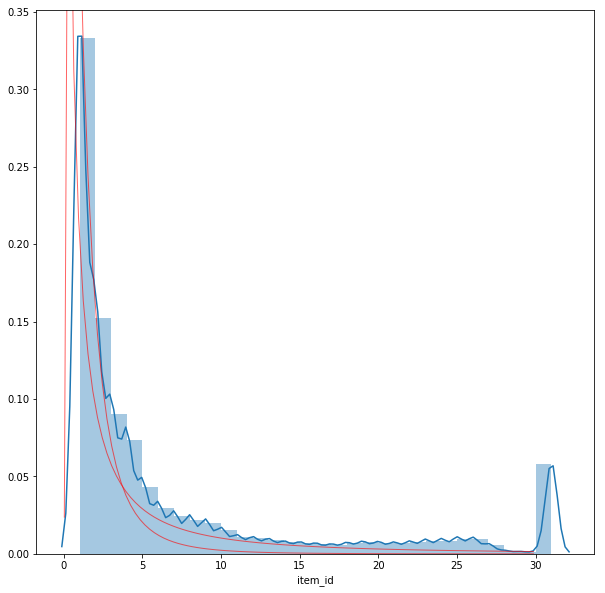

In [19]:
"""
If we adjust the 's' parameter - or the variance in the distribution, we see that we can create two sets of user 
distributions - one in which users are more likely to click more, another in which users are more likely to click
less.  Still, from the results above, we see that the two distributions do not average out to the old distribution.
Our goal is for the two distributions to SUM to the original distribution.  The math for a lognormal distribution
is a little tricky, suggesting a power law distributuion would be best suited for this challenge.
"""

fig = plt.figure(figsize=(10, 10))

sns.distplot(clipped_interactions, bins=30)

delta = .5
s = 1.46

x = np.linspace(lognorm.ppf(0.01, s),
                lognorm.ppf(0.99, s), 100)
plt.plot(x, lognorm.pdf(x, s + delta),
       'r-', lw=1, alpha=0.6, label='upper lognorm pdf')

plt.plot(x, lognorm.pdf(x, s - delta),
       'r-', lw=1, alpha=0.6, label='lower lognorm pdf')


plt.show()

Fitted powerlaw distribution with error=0.04763707356736405)
Fitted exponpow distribution with error=0.052533314795307644)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4289: RuntimeWarning: divide by zero encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4289: RuntimeWarning: invalid value encountered in multiply
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4289: RuntimeWarning: overflow encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))


Fitted powerlognorm distribution with error=0.00811842952326976)


/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4321: RuntimeWarning: divide by zero encountered in power
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))
/Users/jackson.kontny/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4321: RuntimeWarning: invalid value encountered in multiply
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))


Fitted powernorm distribution with error=nan)


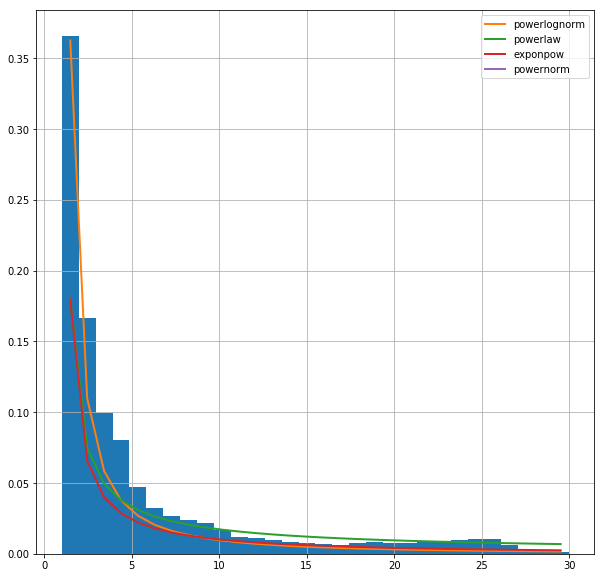

In [21]:
fig = plt.figure(figsize=(10, 10))
power_fit = Fitter(
    clipped_interactions,
    distributions=['powerlaw', 'exponpow', 'powerlognorm', 'powernorm'],
    bins=30,
    xmin=1,
    xmax=30,
    timeout=120,
)
power_fit.fit()
power_fit.summary()
plt.show()

In [24]:
"""
We see that a is close to .2, the axis is adjusted by one (which makes sense because we have no 0 values), and scale
is adjusted by a factor of 30
"""

powerlaw_params = power_fit.fitted_param['powerlaw']
print(powerlaw_params)
pl_a, pl_loc, pl_scale = powerlaw_params

(0.19800766486970767, 0.99999999999999978, 30.42432545082707)


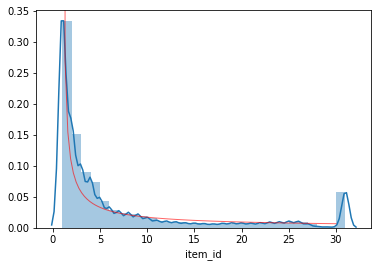

In [33]:
# Lets make sure we can plot this correctoy
sns.distplot(clipped_interactions, bins=30)
x = np.linspace(1, 30, 100)
plt.plot(x, powerlaw.pdf(x, *powerlaw_params),
       'r-', lw=1, alpha=0.6, label='upper lognorm pdf')

plt.show()

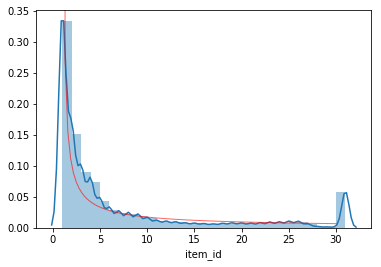

In [34]:
"""
This graph shows it is fine to generalize with 0.2 for the exponent and 30 for the scale parameter.  We need to use
.99999 instead of 1 for loc parameter because 1 will result in a divide by 0 error.
"""
sns.distplot(clipped_interactions, bins=30)
x = np.linspace(1, 30, 100)
plt.plot(x, powerlaw.pdf(x, .2, .999999999, 30),
       'r-', lw=1, alpha=0.6, label='upper lognorm pdf')

plt.show()